# **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from keras.callbacks import Callback


# **Read Data**

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

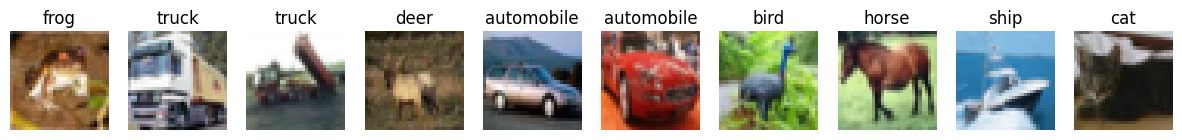

In [14]:
def show_images_labels(images, labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

show_images_labels(X_train, y_train)


# **Buildng Neural Network**

In [25]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 2048)             

In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [28]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 83s 52ms/step - loss: 1.3579 - accuracy: 0.5182 - val_loss: 1.8037 - val_accuracy: 0.4315
Epoch 2/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0396 - accuracy: 0.6371 - val_loss: 1.1099 - val_accuracy: 0.6139
Epoch 3/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9194 - accuracy: 0.6811 - val_loss: 0.9553 - val_accuracy: 0.6680
Epoch 4/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8334 - accuracy: 0.7116 - val_loss: 0.9571 - val_accuracy: 0.6785
Epoch 5/5
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7677 - accuracy: 0.7328 - val_loss: 0.8347 - val_accuracy: 0.7120


313/313 [==============================] - 5s 17ms/step
cat


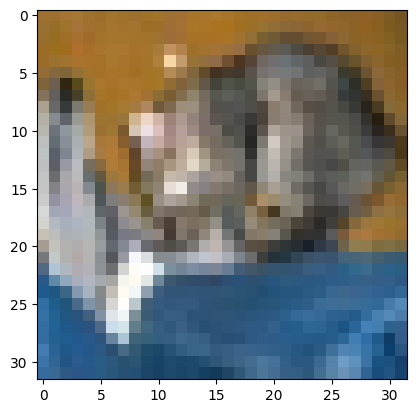

In [30]:
x = model.predict(X_test)


frog


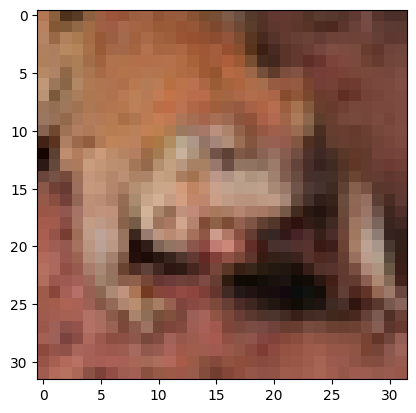

In [33]:
plt.imshow(X_test[5])
print(class_names[np.argmax(x[5])])